In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
image_color = cv2.imread('passport.JPEG')

In [7]:
image = cv2.imread('passport.JPEG')
image_detected = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# gray = cv2.medianBlur(gray, 25)
circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, 60, 100)
if circles is not None:
	circles = np.round(circles[0, :]).astype("int")
	for (x, y, r) in circles:
		cv2.circle(image_detected, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(image_detected, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

# plt.axis('off')
# plt.imshow(image_detected[:,:,::-1])

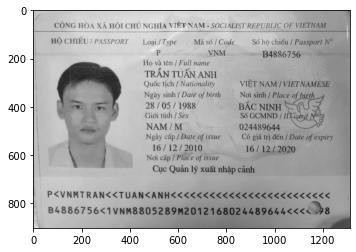

In [8]:
plt.imshow(gray, cmap='gray')

In [11]:
class HoughCircleDetection:
    def __init__(self, rmin=10, rmax=20, step=180, threshold=0.4):
        self.rmin = rmin
        self.rmax = rmax
        self.step = step
        self.threshold = threshold
        
    def detect(self, image):
        points = []
        angle = 2 * np.pi / self.step
        for r in range(self.rmin, self.rmax + 1):
            for t in range(self.step):
                points.append((r, int(r * np.cos(angle * t)), int(r * np.sin(angle * t))))
        
        acc = defaultdict(int)
        edges = np.squeeze(cv2.findNonZero(image))
        for x, y in edges:
            for r, dx, dy in points:
                a = x - dx
                b = y - dy
                acc[(a, b, r)] += 1
            
        circles = []
        for k, v in sorted(acc.items(), key=lambda i: -i[1]):
            x, y, r = k
            if v / self.step >= self.threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
                circles.append((x, y, r))
        
        return circles
    
    def detect_circles(self, image):
        angles = np.arange(0, 2 * math.pi, 2 * math.pi / self.step)
        radius = np.arange(self.rmin, self.rmax, 1)

        radius_arr = np.broadcast_to(np.expand_dims(radius, axis=1), (radius.size, angles.size))
        angles_arr = np.broadcast_to(np.expand_dims(angles, axis=0), (radius.size, angles.size))
        dx = radius_arr * np.cos(angles_arr)
        dy = radius_arr * np.sin(angles_arr) 
        dxy = np.stack((dx, dy), axis=2) 
        

        edges = np.squeeze(cv2.findNonZero(image)) 
        
        dxy_arr = np.broadcast_to(np.expand_dims(dxy, axis=0), shape=(edges.shape[0], dxy.shape[0], dxy.shape[1], dxy.shape[2]))
        edges = np.broadcast_to(np.expand_dims(edges, axis=(1, 2)), shape=(edges.shape[0], dxy.shape[0], dxy.shape[1], edges.shape[1]))
            
        circles = edges - dxy_arr 

In [ ]:
from collections import defaultdict
import time

image = cv2.imread('passport.JPEG', 0)
image_detected = image.copy()

start_time = time.time()
edge = cv2.Canny(image, 50, 150)
hough = HoughCircleDetection(15, 30, 180, 0.5)

circles = hough.detect(edge)

for x, y, r in circles:
    cv2.circle(image_detected, (x, y), r, (0, 255, 0), 2)
my_time = time.time() - start_time


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].axis('off')

ax[1].imshow(image_detected, cmap="gray")
ax[1].set_title('Implement: ' + str(my_time))
ax[1].axis('off')

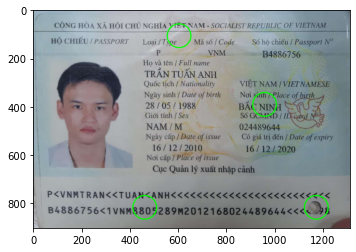

In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('passport.JPEG')
output = image.copy()
height, width = image.shape[:2]
maxRadius = int(1.1*(width/12)/2)
minRadius = int(0.9*(width/12)/2)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
circles = cv2.HoughCircles(image=gray, 
                           method=cv2.HOUGH_GRADIENT, 
                           dp=71, 
                           minDist=450,
                           param1=50,
                           param2=50,
                           minRadius=minRadius,
                           maxRadius=maxRadius                           
                          )

if circles is not None:
    # convert the (x, y) coordinates and radius of the circles to integers
    circlesRound = np.round(circles[0, :]).astype("int")
    # loop over the (x, y) coordinates and radius of the circles
    for (x, y, r) in circlesRound:
        cv2.circle(output, (x, y), r, (0, 255, 0), 4)

    plt.imshow(output[:,:,::-1])
else:
    print ('No circles found')

In [24]:
import cv2
import numpy as np

# Load image, grayscale, median blur, Otsus threshold
image = cv2.imread('passport.JPEG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.medianBlur(gray, 11)
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# Morph open 
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)

# Find contours and filter using contour area and aspect ratio
cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.04 * peri, True)
    area = cv2.contourArea(c)
    if len(approx) > 5 and area > 1000 and area < 500000:
        ((x, y), r) = cv2.minEnclosingCircle(c)
        cv2.circle(image, (int(x), int(y)), int(r), (36, 255, 12), 2)

In [49]:
import cv2
import matplotlib.pyplot as plt

In [50]:
image = cv2.imread('passport.JPEG')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray, (11, 11), 0)
blur = cv2.medianBlur(gray, 5)

In [51]:
circles = cv2.HoughCircles(blur, cv2.HOUGH_GRADIENT, 20, 100,
                             param1=100,param2=90,minRadius=0,maxRadius=200)

In [52]:
if circles is not None:
	circles = np.round(circles[0, :]).astype("int")
	for (x, y, r) in circles:
		cv2.circle(image, (x, y), r, (0, 255, 0), 4)
		cv2.rectangle(image, (x - 5, y - 5), (x + 5, y + 5), (0, 128, 255), -1)

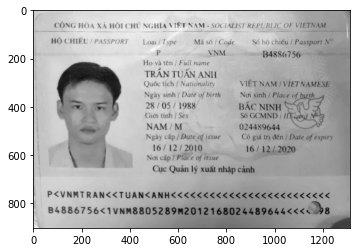

In [47]:
plt.imshow(blur, cmap='gray')

In [58]:
img = cv2.imread("passport.JPEG")
# cv2.imshow("original", img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# cv2.imshow("gray", gray)

blur = cv2.medianBlur(gray, 31)
# cv2.imshow("blur", blur)

ret, thresh = cv2.threshold(blur, 127, 255, cv2.THRESH_OTSU)
# cv2.imshow("thresh", thresh)

canny = cv2.Canny(thresh, 75, 200)
# cv2.imshow('canny', canny)

im2, contours, hierarchy = cv2.findContours(canny, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

contour_list = []
for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.01 * cv2.arcLength(contour, True), True)
    area = cv2.contourArea(contour)
    if 5000 < area < 15000:
        contour_list.append(contour)

msg = "Total holes: {}".format(len(approx)//2)
cv2.putText(img, msg, (20, 40), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 255), 2, cv2.LINE_AA)

cv2.drawContours(img, contour_list, -1, (0, 255, 0), 2)

array([[[197, 180, 153],
        [199, 182, 156],
        [200, 183, 157],
        ...,
        [111, 102,  93],
        [106,  96,  89],
        [ 99,  89,  82]],

       [[197, 180, 153],
        [199, 182, 156],
        [199, 182, 156],
        ...,
        [111, 101,  94],
        [106,  96,  89],
        [ 99,  89,  82]],

       [[196, 179, 152],
        [198, 181, 155],
        [198, 181, 155],
        ...,
        [111, 101,  94],
        [106,  96,  89],
        [100,  90,  83]],

       ...,

       [[193, 181, 179],
        [204, 192, 190],
        [210, 201, 198],
        ...,
        [ 65,  60,  92],
        [ 65,  60,  92],
        [ 65,  60,  92]],

       [[199, 187, 185],
        [194, 185, 182],
        [196, 187, 184],
        ...,
        [ 65,  60,  92],
        [ 65,  60,  92],
        [ 65,  60,  92]],

       [[202, 193, 190],
        [206, 197, 194],
        [219, 210, 207],
        ...,
        [ 65,  60,  92],
        [ 65,  60,  92],
        [ 65,  60,  92]]

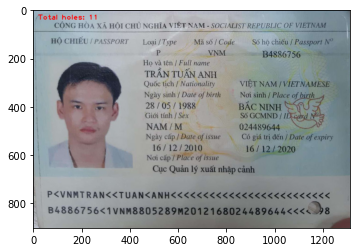

In [60]:
plt.imshow(img[:,:,::-1])

# ................................

In [5]:
class HoughCircleDetection:
    def __init__(self, rmin=10, rmax=20, step=180, threshold=0.4):
        self.rmin = rmin
        self.rmax = rmax
        self.step = step
        self.threshold = threshold
        
    def detect(self, image):
        points = []
        angle = 2 * np.pi / self.step
        for r in range(self.rmin, self.rmax + 1):
            for t in range(self.step):
                points.append((r, int(r * np.cos(angle * t)), int(r * np.sin(angle * t))))
        
        acc = defaultdict(int)
        edges = np.squeeze(cv2.findNonZero(image))
        for x, y in edges:
            for r, dx, dy in points:
                a = x - dx
                b = y - dy
                acc[(a, b, r)] += 1
            
        circles = []
        for k, v in sorted(acc.items(), key=lambda i: -i[1]):
            x, y, r = k
            if v / self.step >= self.threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
                circles.append((x, y, r))
        
        return circles
    
    def detect_circles(self, image):
        angles = np.arange(0, 2 * math.pi, 2 * math.pi / self.step)
        radius = np.arange(self.rmin, self.rmax, 1)

        radius_arr = np.broadcast_to(np.expand_dims(radius, axis=1), (radius.size, angles.size))
        angles_arr = np.broadcast_to(np.expand_dims(angles, axis=0), (radius.size, angles.size))
        dx = radius_arr * np.cos(angles_arr)
        dy = radius_arr * np.sin(angles_arr) 
        dxy = np.stack((dx, dy), axis=2) 
        

        edges = np.squeeze(cv2.findNonZero(image)) 
        
        dxy_arr = np.broadcast_to(np.expand_dims(dxy, axis=0), shape=(edges.shape[0], dxy.shape[0], dxy.shape[1], dxy.shape[2]))
        edges = np.broadcast_to(np.expand_dims(edges, axis=(1, 2)), shape=(edges.shape[0], dxy.shape[0], dxy.shape[1], edges.shape[1]))
            
        circles = edges - dxy_arr 

(-0.5, 462.5, 330.5, -0.5)

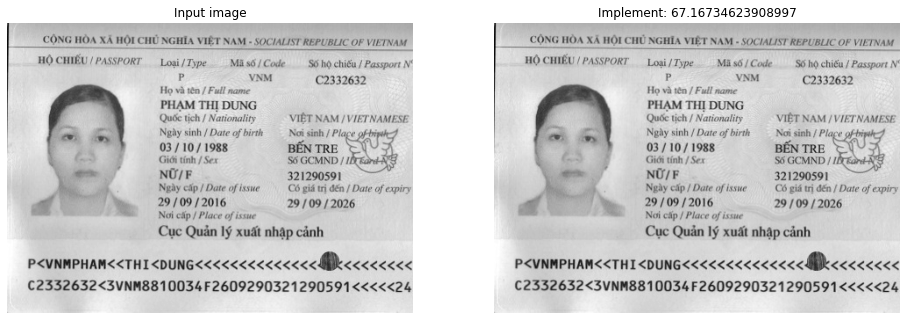

In [10]:
from collections import defaultdict
import time
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image.jpg', 0)
image_detected = image.copy()

start_time = time.time()
edge = cv2.Canny(image, 50, 150)
hough = HoughCircleDetection(30, 35, 180, 0.5)

circles = hough.detect(edge)

for x, y, r in circles:
    cv2.circle(image_detected, (x, y), r, (0, 255, 0), 2)
my_time = time.time() - start_time


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].axis('off')

ax[1].imshow(image_detected, cmap="gray")
ax[1].set_title('Implement: ' + str(my_time))
ax[1].axis('off')